# WildObs Tech Demo: Using YOLO-World for Australian Animal Detection

WildObs is a new national platform that will provide and end-to-end solution for wildlife monitoring in Australia. One of its key features is the ability to automatically detect Australian animals in images. For this, the WildObs team is developing the next generation of Australia's animal detection models using existing national and international tools.

In this notebook, we use the powerful image hosting services of the Atlas of Living Australia (ALA) and one of the newest vision-language models YOLO-World. YOLO-World, an innovative approach that enhances YOLO with open-vocabulary detection capabilities through vision-language modeling and pre-training on large-scale datasets.

In this notebook, we demonstrate how easy is to use YOLO-World for generic animal detection.

**NOTE: This notebook was developed in Google Colab, which runs Python 3.10.12.**

## Install required libraries
Using pip, we install the required libraries for this notebook.
    
    ```bash
    !pip install -q roboflow autodistill-yolo-world
    ```

In [3]:
!pip3 install -q roboflow autodistill-yolo-world

## Define image to be processed
Using the images that we downloaded in the yolov11 notebook, we will select 3 challenging echidna images to be processed by YOLO-World. Of all Australian animals, echidnas are an interesting test case because they are small, have a unique shape, and are often found in challenging environments. Considering that computer vision models are trained on generic datasets, I expect that YOLO-World will have a hard time detecting echidnas (as animals).


In [9]:
image1 = '/content/0a4c2e76-883c-45e6-8f26-1c6dd41d88e0.jpg' # easy picture
image2 = '/content/0f4ba498-a38b-4d4d-9fda-a8c21c402f6c.jpg' # difficult image
image3 = '/content/1dbc69c2-91bc-4780-a37e-51d361eb9edd.jpg' #camera trap image

In [5]:
from autodistill_yolo_world import YOLOWorldModel
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2

[10/22/24 00:52:30] WARNING  Your inference package version 0.9.11 is out of date! Please upgrade to ]8;id=994715;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=151612;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             version 0.24.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Define the ontology
An ontology is a prompt for the model to understand the context of the image. In this case, we are instructing the model to detect animals, in the same way that MegaDetector would do. In this case, we can also adjust the description of the class to be more specific, for example "a small bird with a red head" instead of just "bird".

In [6]:
base_model = YOLOWorldModel(
    ontology=CaptionOntology(
        {
            "animal": "animal"
        }
    )
)

100%|███████████████████████████████████████| 338M/338M [00:25<00:00, 13.9MiB/s]


## Running the inference on single images
We can now run the inference on a single image. The model will return the bounding boxes and the class of the detected animals.

In [10]:
# run inference on a single image
results1 = base_model.predict(image1)
results2 = base_model.predict(image2)
results3 = base_model.predict(image3)


## Plot the results
Finally, we can plot the results of the detection on the image, and lets see how the model performs at detecting echidnas.

### Image 1

This image is a close-up of an echidna. The echidna is in the center of the image, so it should be an easy detection. The Yolov11 detected this exact same foto as a 'bear'; lets see if YOLO-World can do better.

BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


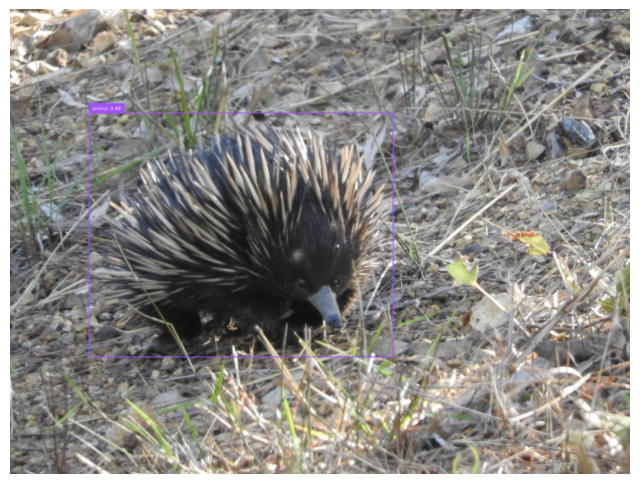

In [15]:
plot(
    image=cv2.imread(image1),
    classes=base_model.ontology.classes(),
    detections=results1
)


### Image 2
This second image is more challening because the echidna is partially covered by branches. This is a more realistic scenario of how echidnas are often found in the wild.

BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


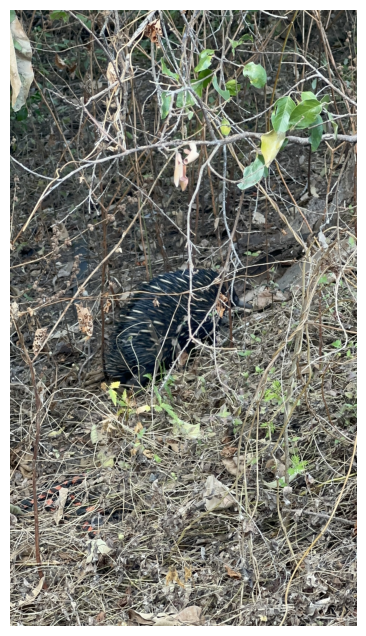

In [16]:
plot(
    image=cv2.imread(image2),
    classes=base_model.ontology.classes(),
    detections=results2
)

#### Improving Image 2 Results
Using the standard animal query gave us a negative result, with the echina not being detected. However, we can improve the results by using a more specific query. In this case, we can use the query shown below where we try to help the model by providing more information about the animal we are looking for. Additionally, we can also provide the model with another class to search for, in this case, plants so it understand that the animal is partially covered by branches. 

BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


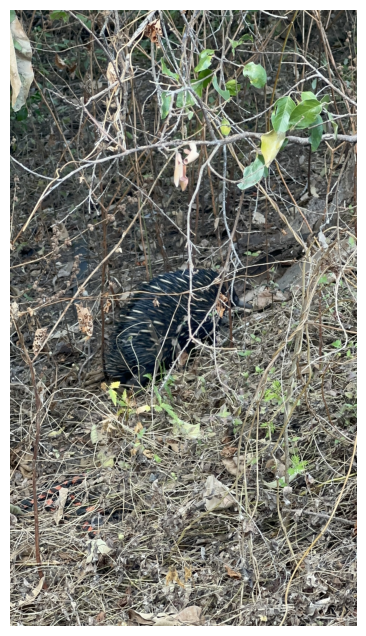

In [27]:
base_model_update = YOLOWorldModel(
    ontology=CaptionOntology(
        {
            "animal": "black animal with white spikes hidden in the bush",
            "plant":"plant"
        }
    )
)
results2_1 = base_model_update.predict(image2, 0.05)
plot(
    image=cv2.imread(image2),
    classes=base_model_update.ontology.classes(),
    detections=results2_1
)

Even with the more specific query, the model was not able to detect the echidna. This is a good example of how the model can fail when the animal is partially covered by other objects and the limitations of large scale models.

### Image 3
Finally, image 3, is a photo of an echidna taken with a camera trap. This is a common scenario for wildlife monitoring, and the type of images that WildObs would be processing.

BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


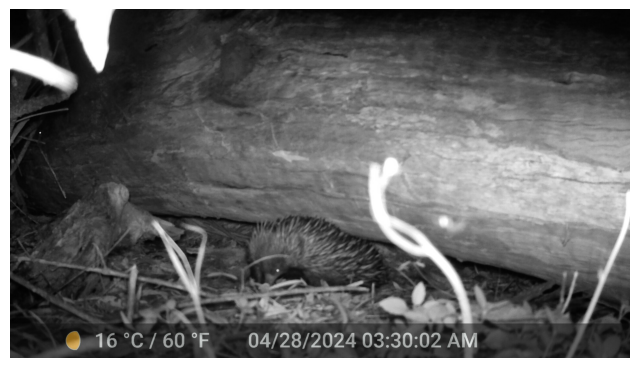

In [17]:
plot(
    image=cv2.imread(image3),
    classes=base_model.ontology.classes(),
    detections=results3
)

#### Improving Image 3 Results
Like in image 2, the model cannot detect the echina that appears in image3. Lets try to improve the results by providing a more specific query to the model. 

BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


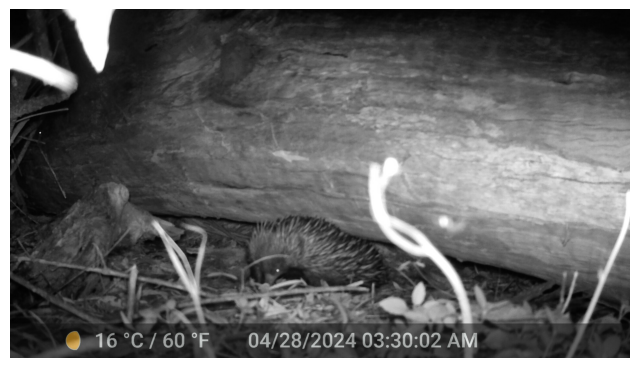

In [24]:
base_model_update2 = YOLOWorldModel(
    ontology=CaptionOntology(
        {
            "animal": "spiky black animal on the floor and underneath a log",
            "log": "log",
            "plant": "plant"
        }
    )
)
results3_1 = base_model_update2.predict(image3, 0.1)
plot(
    image=cv2.imread(image3),
    classes=base_model_update2.ontology.classes(),
    detections=results3_1
)

For this final, camera trap image, we try adding three classes to the query: animal, log and plant and none of them were detected. For monitoring purposes, it is important to have a high detection rate, so this is a good example of how the model can fail in real-world scenarios. Similar to the conclusion of our yolov11 notebook, the purpose of WildObs is to develop better large-scale models that can detect Australian animals in challenging environments.